
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LABRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
%matplotlib inline


from sklearn import datasets
import seaborn as sns

In [2]:
breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [3]:
df = pd.read_csv('breast-cancer-wisconsin-data.csv',index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [6]:
df = df.drop('Unnamed: 32', axis=1)

In [7]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
#Make the target column binary.
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
df.head(15)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720


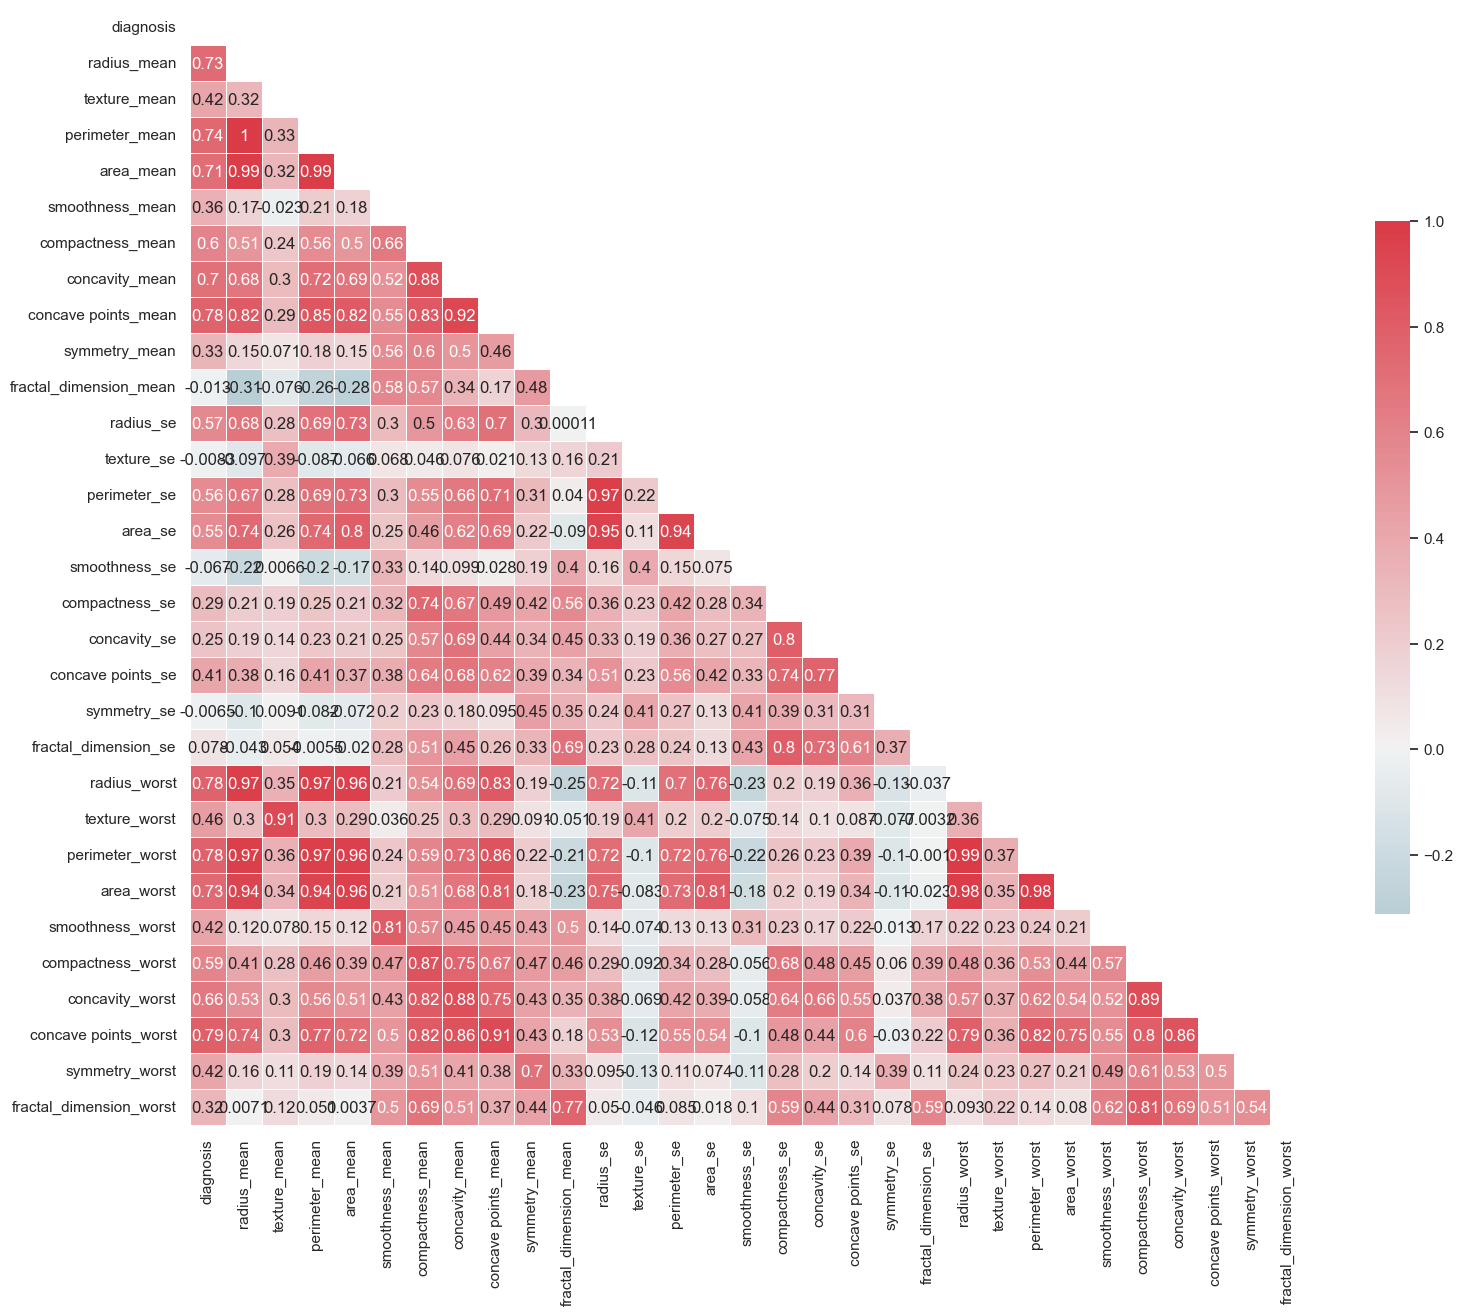

In [10]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [11]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


### 3. Subset & Normalize

Subset the data to only include all columns except diagnosis. We will be comparing the principal components to age specifically, so we are leaving age out.

In [12]:
# ANSWER
y=df['diagnosis']
num_classes= y.unique()
print("Number of classes:", num_classes)

Number of classes: [1 0]


In [13]:
X = df.drop("diagnosis", axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [14]:
# ANSWER
correlation_matrix=df.corr()
print(correlation_matrix)

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.

### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [15]:
# Calculate eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(correlation_matrix)

# Print eigenvalues
print("Eigenvalues:\n", eig_vals)

# Print eigenvectors
print("Eigenvectors:\n", eig_vecs)

Eigenvalues:
 [1.39177709e+01 5.72635217e+00 2.84684948e+00 1.99836314e+00
 1.65907858e+00 1.20750790e+00 6.84719154e-01 4.84855438e-01
 4.16894830e-01 3.50893638e-01 3.04855395e-01 2.90985845e-01
 2.61010421e-01 2.12275550e-01 1.48576184e-01 8.81625619e-02
 7.98601726e-02 5.90353306e-02 5.14619081e-02 4.82159487e-02
 3.07062788e-02 2.95266509e-02 2.73446674e-02 2.42835925e-02
 1.75522144e-02 1.54733379e-02 8.05614370e-03 6.86973193e-03
 1.32634701e-04 7.41678754e-04 1.58846728e-03]
Eigenvectors:
 [[ 2.16916950e-01 -7.76099428e-02  1.03825983e-01  9.80829303e-02
   8.07832685e-02 -1.20502582e-02  1.46156747e-01 -1.82757245e-01
  -3.12727329e-04 -5.02139227e-02  6.44348300e-01 -3.19011095e-01
  -3.39503703e-02  4.79306091e-01  2.47454171e-01  1.77559197e-01
   4.66616890e-03  3.86104471e-02 -6.07206769e-02  9.19338179e-02
  -3.66629983e-02  5.32798034e-02  2.43929179e-02  1.73954642e-02
   4.94301992e-02 -6.81411410e-03 -2.35299964e-02 -1.24864678e-02
  -1.34843760e-03  5.60685994e-03  

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [16]:
def calculate_cum_var_exp(eig_vals):
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    var_exp = [(i / tot)*100 for i in eig_vals]
    var_exp = []
    for i in eig_vals:
        var_i = ((i / tot)*100)
        var_exp.append(var_i)
    cum_var_exp = np.cumsum(var_exp)
    return cum_var_exp

In [17]:
def calculate_cum_var_exp(eig_vals):
    total = sum(eig_vals)
    var_exp = [(i / total) * 100 for i in sorted(eig_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    return cum_var_exp

In [18]:
cum_var_exp = calculate_cum_var_exp(eig_vals)

print(cum_var_exp)

[ 44.89603531  63.36813909  72.55152452  78.99785725  84.34972363
  88.2449104   90.45368186  92.01773166  93.3625537   94.49446866
  95.47787316  96.41653717  97.25850628  97.94326612  98.42254413
  98.70693949  98.96455295  99.1549895   99.32099566  99.47653097
  99.57558349  99.67083075  99.75903935  99.83737352  99.89399357
  99.94390756  99.96989512  99.99205555  99.99717963  99.99957215
 100.        ]


In [19]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

C:\Users\Manish\AppData\Local\Temp\ipykernel_4772\1665839980.py:22: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(12)
C:\Users\Manish\AppData\Local\Temp\ipykernel_4772\1665839980.py:25: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(12)


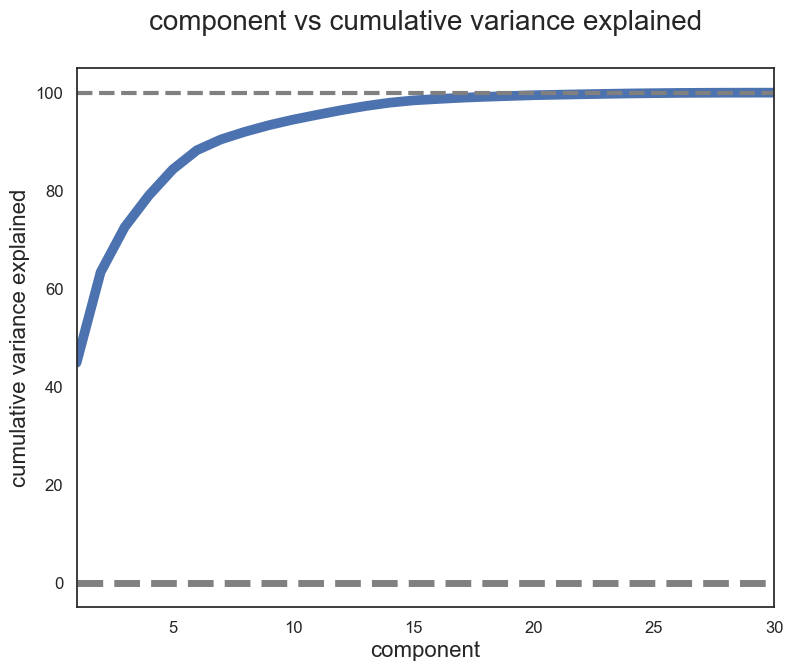

In [20]:
plot_var_exp(eig_vals)

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [21]:
# ANSWER
# Create an instance of PCA
pca= PCA()

# Fit Xs
pca.fit(X)

PCA()

In [22]:
(range(1, pca.n_components_ + 1))

range(1, 31)

In [23]:
len(pca.explained_variance_)

30

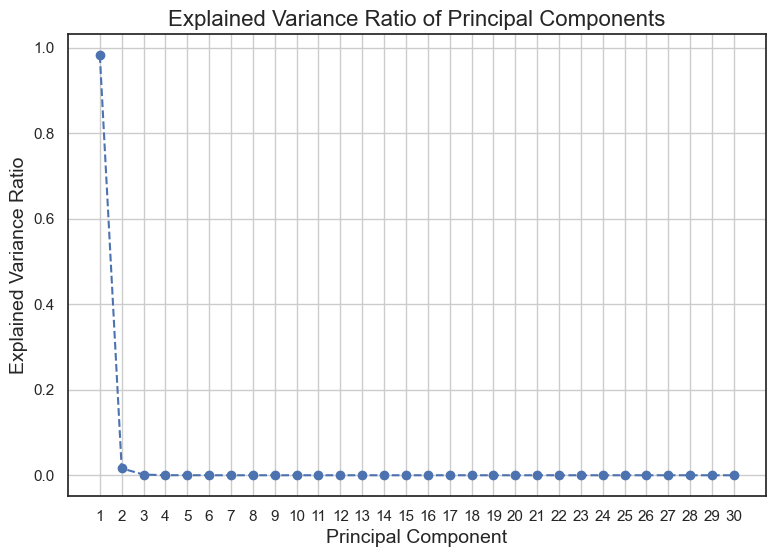

In [24]:
# ANSWER
# Plot explained_variance_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(9, 6))

# Plot the explained variance ratio for each principal component
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')

# Add a title and labels
plt.title('Explained Variance Ratio of Principal Components', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)

# Show the plot
plt.show()

In [25]:
# ANSWER
# Apply dimensionality reduction to Xs using transform

# Create an instance of PCA specifying the number of components
pca = PCA(n_components=2)  # Reduce to 2 dimensions

X_transformed = pca.fit_transform(X)

print("Transformed Data:\n", X_transformed)

Transformed Data:
 [[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]


C:\Users\Manish\anaconda3\envs\capstone_project\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Manish\anaconda3\envs\capstone_project\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Manish\anaconda3\envs\capstone_project\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Manish\anaconda3\envs\capstone_project\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


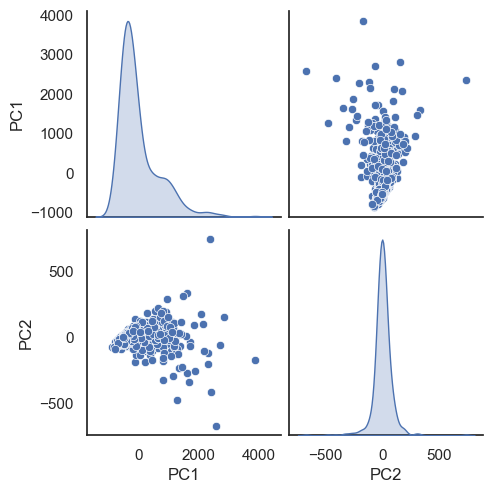

In [26]:
# Create PairPlot of PCA

# Create a DataFrame from the PCA-transformed data
pca_df = pd.DataFrame(X_transformed, columns=['PC1', 'PC2'])

# Create a pairplot
sns.pairplot(pca_df, palette='viridis', diag_kind='kde')
plt.show()

### 7. Split Data to 80/20 and Use PCA you gon in 6 as X

Split data 80/20 and Use KNN to find score.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [41]:
# Check that X and y are not None and are of valid types
print(f"X type: {type(X)}, X shape: {X.shape if isinstance(X, np.ndarray) else 'N/A'}")
print(f"y type: {type(y)}, y shape: {y.shape if isinstance(y, np.ndarray) else 'N/A'}")

# Ensure X is a 2D array or DataFrame and y is a 1D array or Series
if X is None or y is None:
    print("Error: X or y is None!")

X type: <class 'pandas.core.frame.DataFrame'>, X shape: N/A
y type: <class 'pandas.core.series.Series'>, y shape: N/A


In [42]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (455, 30), X_test shape: (114, 30)
y_train shape: (455,), y_test shape: (114,)


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check if the scaling is done correctly
print(X_train_scaled.shape, X_test_scaled.shape)

(455, 30) (114, 30)


In [43]:
# Check for NaN values in X and y
print(f"Any NaN values in X: {np.any(np.isnan(X))}")
print(f"Any NaN values in y: {np.any(np.isnan(y))}")

Any NaN values in X: False
Any NaN values in y: False


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply StandardScaler to X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the scaled data
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (455, 30)
X_test_scaled shape: (114, 30)


In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16)

# Apply PCA to the scaled data
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

# Check the shapes of the PCA-transformed data
print(f"X_train_scaled_pca shape: {X_train_scaled_pca.shape}")
print(f"X_test_scaled_pca shape: {X_test_scaled_pca.shape}")

X_train_scaled_pca shape: (455, 16)
X_test_scaled_pca shape: (114, 16)


In [48]:
# Ensure the result is a NumPy array
X_train_scaled_pca = np.array(X_train_scaled_pca)
X_test_scaled_pca = np.array(X_test_scaled_pca)

In [51]:
print(X_train_scaled_pca.shape)

(455, 16)


In [52]:
print(y_train.shape)

(455,)


In [53]:
from sklearn.decomposition import PCA

# Apply PCA (if not already done) to scaled data
pca = PCA(n_components=2)  # You can change the number of components if needed
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

print(X_train_scaled_pca.shape)  # Should be (n_samples, n_components)
print(X_test_scaled_pca.shape)

(455, 2)
(114, 2)


In [54]:
knn.fit(X_train_scaled_pca, y_train)
y_pred = knn.predict(X_test_scaled_pca)

In [55]:
# Calculate the accuracy of the KNN classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy of KNN classifier on the standardized test data: {accuracy:.4f}")

Accuracy of KNN classifier on the standardized test data: 0.9737


In [56]:
# Test accuracy of KNN using standardised PCA-transformed data

# Predict the labels for the PCA-transformed test data
y_pred_pca = knn.predict(X_test_scaled_pca)

# Evaluate the accuracy of the KNN classifier
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy of KNN classifier on PCA-transformed test data: {accuracy_pca:.4f}")

Accuracy of KNN classifier on PCA-transformed test data: 0.9737


# Some Experement with KNN

In [49]:
# Instantiate and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled_pca, y_train)

KNeighborsClassifier()

In [50]:
# Make predictions
y_pred = knn.predict(X_test_scaled_pca)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier on the PCA-transformed test data: {accuracy:.4f}")

AttributeError: 'NoneType' object has no attribute 'split'

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit KNN to the PCA-transformed training data
knn.fit(X_train_scaled_pca, y_train)
print("KNN Classifier has been fitted to the training data.")

# Predict using PCA-transformed test data
y_pred = knn.predict(X_test_scaled_pca)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier on the PCA-transformed test data: {accuracy:.4f}")

KNN Classifier has been fitted to the training data.


AttributeError: 'NoneType' object has no attribute 'split'

In [47]:
print(f"X_train: {X_train[:5]}")
print(f"y_train: {y_train[:5]}")
print(f"X_train_scaled: {X_train_scaled[:5]}")
print(f"X_train_scaled_pca: {X_train_scaled_pca[:5]}")

X_train:           radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
859471          9.029         17.33           58.79      250.5   
873593         21.090         26.57          142.70     1311.0   
859196          9.173         13.86           59.20      260.9   
88466802       10.650         25.22           68.01      347.0   
858970         10.170         14.88           64.55      311.9   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
859471            0.10660           0.14130         0.31300   
873593            0.11410           0.28320         0.24870   
859196            0.07721           0.08751         0.05988   
88466802          0.09657           0.07234         0.02379   
858970            0.11340           0.08061         0.01084   

          concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
id       

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

# Check the shape of PCA-transformed data
print(X_train_scaled_pca.shape, X_test_scaled_pca.shape)

(455, 16) (114, 16)


In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled_pca, y_train)  # Use PCA-transformed data for fitting

print("KNN Classifier has been fitted to the training data.")

KNN Classifier has been fitted to the training data.


In [40]:
# Predict using PCA-transformed test data
y_pred = knn.predict(X_test_scaled_pca)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier on the PCA-transformed test data: {accuracy:.4f}")

AttributeError: 'NoneType' object has no attribute 'split'

In [33]:
# Set KNN classifier to use 5 neighbours and fit to X_train_scaled

# Instantiate the KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier to the scaled training data
knn.fit(X_train_scaled, y_train)

# Optionally, print a message to confirm the model has been fitted
print("KNN Classifier has been fitted to the training data.")

KNN Classifier has been fitted to the training data.


In [34]:
# Test accuracy of KNN using standardised data
# Predict the labels for the test set
y_pred = knn.predict(X_test_scaled)

# Calculate the accuracy of the KNN classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy of KNN classifier on the standardized test data: {accuracy:.4f}")

AttributeError: 'NoneType' object has no attribute 'split'

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



